1. Quantidade de famílias em situação de extrema pobreza em São Paulo em 2023: 765114.0

2. Percentual de famílias em situação de extrema pobreza por Distrito em 2023:


,distrito,percentual
0,Parque Do Carmo,0.78%
1,Pedreira,2.27%
2,Penha,0.88%
3,Perdizes,0.08%
4,Perus,1.35%
...,...,...
91,Campo Limpo,1.86%
92,Cidade Dutra,1.55%
93,Cidade Líder,1.32%
94,Cidade Tiradentes,2.97%



3. Distrito com o maior aumento de famílias em situação de pobreza entre 2022 e 2023:


,55
distrito,Grajaú
aumento,5812.0



4. Quantidade de famílias em situação de extrema pobreza por Subprefeitura em 2023:


,ds_nome,qtd_familias
0,AGUA RASA,3017
1,ALTO DE PINHEIROS,205
2,ANHANGUERA,7320
3,ARICANDUVA,5089
4,ARTUR ALVIM,6536
...,...,...
91,VILA MARIANA,1389
92,VILA MATILDE,4146
93,VILA MEDEIROS,7646
94,VILA PRUDENTE,4843


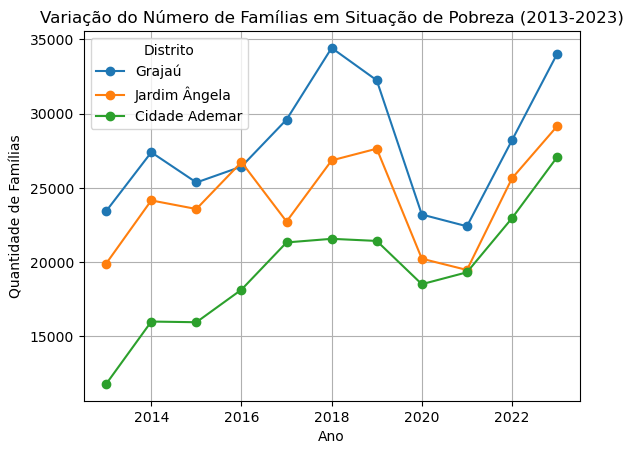


6. De acordo com os dados do ObservaSampa, em 2023 metade dos Distritos de São Paulo, no máximo, 5610.5 famílias em situação de extrema pobreza.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os DataFrames com os dados
df_observasampa = pd.read_csv('observasampa_familias_extrema_pobreza.csv')
df_geosampa = pd.read_csv('geosampa_distritos.csv')

# 1. Quantas famílias em situação de extrema pobreza existiam em São Paulo em 2023?
df_observasampa_2023 = df_observasampa[df_observasampa['ano'] == 2023].reset_index(drop=True)
df_observasampa_2023['qtd_familias'] = pd.to_numeric(df_observasampa_2023['qtd_familias'], errors='coerce')
df_observasampa_2023['qtd_familias'] = df_observasampa_2023['qtd_familias'].fillna(0)
total_familias_2023 = df_observasampa_2023['qtd_familias'].sum()

print("1. Quantidade de famílias em situação de extrema pobreza em São Paulo em 2023:", total_familias_2023)

# 2. Qual o percentual (em relação ao total da cidade) de famílias em situação de extrema pobreza por Distrito em 2023?
df_observasampa_2023['percentual'] = df_observasampa_2023['qtd_familias'] / total_familias_2023 * 100
df_observasampa_2023['percentual'] = df_observasampa_2023['percentual'].map('{:.2f}%'.format)

print("\n2. Percentual de famílias em situação de extrema pobreza por Distrito em 2023:")
display(df_observasampa_2023[['distrito', 'percentual']])

# 3. Qual distrito apresentou o maior aumento de famílias em situação de pobreza entre 2022 e 2023?
df_observasampa_2022 = df_observasampa[df_observasampa['ano'] == 2022].reset_index(drop=True)
df_observasampa_2022['qtd_familias'] = pd.to_numeric(df_observasampa_2022['qtd_familias'], errors='coerce')
df_observasampa_2022['qtd_familias'] = df_observasampa_2022['qtd_familias'].fillna(0)

df_aumento = df_observasampa_2023.merge(df_observasampa_2022, on='distrito', suffixes=('_2023', '_2022'))
df_aumento['aumento'] = df_aumento['qtd_familias_2023'] - df_aumento['qtd_familias_2022']
distrito_maior_aumento = df_aumento.loc[df_aumento['aumento'].idxmax()]

print("\n3. Distrito com o maior aumento de famílias em situação de pobreza entre 2022 e 2023:")
display(distrito_maior_aumento[['distrito', 'aumento']].to_frame())

# 4. Quantas famílias em situação de extrema pobreza existiam em cada Subprefeitura de São Paulo em 2023?
df_subprefeitura_2023 = df_observasampa_2023.groupby('ds_nome')['qtd_familias'].sum().reset_index()
df_subprefeitura_2023['qtd_familias'] = df_subprefeitura_2023['qtd_familias'].map('{:.0f}'.format)

print("\n4. Quantidade de famílias em situação de extrema pobreza por Subprefeitura em 2023:")
display(df_subprefeitura_2023)

# 5. Como variou o número de famílias em situação de pobreza entre 2013 e 2023 nos Distritos de Grajaú, Jardim Ângela e Cidade Ademar? Exiba graficamente o resultado, escolhendo a visualização que achar mais adequada.
df_variacao = df_observasampa.pivot(index='ano', columns='distrito', values='qtd_familias')
distritos_interesse = ['Grajaú', 'Jardim Ângela', 'Cidade Ademar']
df_variacao[distritos_interesse].plot(marker='o')
plt.title('Variação do Número de Famílias em Situação de Pobreza (2013-2023)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Famílias')
plt.grid(True)
plt.legend(title='Distrito')
plt.show()

# 6. Complete a seguinte frase: "De acordo com os dados do ObservaSampa, em 2023 metade dos Distritos de São Paulo, no máximo, _ famílias em situação de extrema pobreza". Qual informação você utilizou para completar a frase?
metade_familias_maximo = df_observasampa_2023['qtd_familias'].median()
print("\n6. De acordo com os dados do ObservaSampa, em 2023 metade dos Distritos de São Paulo, no máximo,", metade_familias_maximo, "famílias em situação de extrema pobreza.")